# Forest Cover Type Prediction

# Objective
The objective of the project is build a system that can predict the type of forest cover using Machine Learning for a 30m x 30m
patch of land in the forest.
Integer Classification of the forest cover types:


1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7.  Krummholz

## Description of main columns:
- **Elevation** elevation in meters
- **Aspect** aspect in degrees azimuth
- **Slope** slope in degrees
- **Horizontal_Distance_To_Hydrology** Horz dist to nearest surface water features
- **Vertical_Distance_To_Hydrology** Vert dist to nearest surface water features
- **Horizontal_Distance_To_Roadways** Horz dist to nearest roadway
- **Hillshade_9am** (0 to 255 index) hillshade index at 9am, summer solstice
- **Hillshade_Noon** (0 to 255 index) hillshade index at noon, summer solstice
- **Hillshade_3pm** (0 to 255 index) hillshade index at 3pm, summer solstice
- **Horizontal_Distance_To_Fire_Points** Horz dist to nearest wildfire ignition points
- **Wilderness_Area** (4 binary cols, 0=abs or 1=pres) wilderness area designation
- **Soil_Type** (40 binary cols, 0=abs or 1=pres) soil type designation
- **Cover_Type** (7 types) forest cover type designation

The wilderness areas are:
1. Rawah
2. Neota
3. Comanche Peak
4. Cache la Poudre

# Importing Libraries

In [2]:
# Data manipulation and numerical operations
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt   # For plotting and visualizations
import seaborn as sns   # For visualizations

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC
from sklearn.model_selection import cross_val_score   # For evaluating model performance
from sklearn.model_selection import learning_curve

# Scikit-learn: Preprocessing
from sklearn.preprocessing import MinMaxScaler      # for Normalizing the data
from sklearn.preprocessing import StandardScaler    # for Standardizing the data

# Scikit-learn: Machine learning model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # for hyperparameter tuning

In [85]:
pd.set_option('display.max_columns', None)  # Show all columns
df=pd.read_csv("train.csv")
df.head(4)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2


In [6]:
df.shape

(15120, 56)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [10]:
df.isnull().sum()  # Checking null values

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [12]:
df.duplicated().sum()   # Checking Duplicated values

0

# Exploratory Data Analysis

To develop the better understanding on the data we will split it into two parts according to Categorical and Numerical Features.

In [16]:
num_feature=df.iloc[:,1:11]
cat_feature=df.iloc[:,11:-1]
print(num_feature.shape)
print(cat_feature.shape)

(15120, 10)
(15120, 44)


The unnecessary column "ID" is excluded from both num_feature and cat_feature.

## Discriptive Statistics of the Numerical Features

In [20]:
# Descriptive Statistics
num_feature.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


- The **Means** of num_features are varying from 16.501587 to 2749.322553
- Maximum variation is in **Horizontal_Distance_To_Roadways** followed by **Horizontal_Distance_To_Fire_Points** **Elevation** and **Horizontal_Distance_To_Hydrology**.

In [23]:
# skewness for numerical feature in the DataFrame
skew_values = num_feature.skew()

# the skewness Series into a DataFrame
skew_df = skew_values.reset_index()  # Reset the index for better formatting
skew_df.columns = ['Column', 'Skewness']  # Rename the columns

print(skew_df)

                               Column  Skewness
0                           Elevation  0.075640
1                              Aspect  0.450935
2                               Slope  0.523658
3    Horizontal_Distance_To_Hydrology  1.488052
4      Vertical_Distance_To_Hydrology  1.537776
5     Horizontal_Distance_To_Roadways  1.247811
6                       Hillshade_9am -1.093681
7                      Hillshade_Noon -0.953232
8                       Hillshade_3pm -0.340827
9  Horizontal_Distance_To_Fire_Points  1.617099


#### Infrences
- **Elevation** has a skewness of 0.075640, indicating that its distribution is nearly symmetrical.
- **Aspect and Slope** also have relatively low skewness values (0.450935 and 0.523658, respectively), showing slight asymmetry.
- **Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points** are moderate positively skewneed (greater than 1).
- **Hillshade_9am, Hillshade_Noon and Hillshade_3pm** are negatively skeweed (less than 0).

In [26]:
# Initializing a dictionary to store outlier details for each numerical feature.
outlier_details = {}
for col in num_feature.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers in the column
    outliers = num_feature[(num_feature[col] < lower_bound) | (num_feature[col] > upper_bound)]
    
    # Store outlier information in the dictionary
    outlier_details[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers),
        'Outlier Values': outliers[col].tolist()
    }

# Display the outlier details for each column
for col, details in outlier_details.items():
    print(f"Column: {col}")
    print(f"  Lower Bound: {details['Lower Bound']}")
    print(f"  Upper Bound: {details['Upper Bound']}")
    print(f"  Number of Outliers: {details['Number of Outliers']}")
    print(f"  Outlier Values (first 10): {details['Outlier Values'][:10]}")
    print()


Column: Elevation
  Lower Bound: 1284.0
  Upper Bound: 4196.0
  Number of Outliers: 0
  Outlier Values (first 10): []

Column: Aspect
  Lower Bound: -229.0
  Upper Bound: 555.0
  Number of Outliers: 0
  Outlier Values (first 10): []

Column: Slope
  Lower Bound: -8.0
  Upper Bound: 40.0
  Number of Outliers: 57
  Outlier Values (first 10): [48, 47, 46, 49, 46, 49, 45, 49, 45, 46]

Column: Horizontal_Distance_To_Hydrology
  Lower Bound: -327.5
  Upper Bound: 724.5
  Number of Outliers: 512
  Outlier Values (first 10): [759, 984, 750, 997, 870, 792, 815, 842, 811, 743]

Column: Vertical_Distance_To_Hydrology
  Lower Bound: -106.0
  Upper Bound: 190.0
  Number of Outliers: 586
  Outlier Values (first 10): [210, 215, 245, 197, 193, 199, 240, 195, -134, -110]

Column: Horizontal_Distance_To_Roadways
  Lower Bound: -1495.0
  Upper Bound: 4529.0
  Number of Outliers: 830
  Outlier Values (first 10): [5253, 4986, 5916, 5199, 5845, 5321, 6371, 5066, 4858, 4567]

Column: Hillshade_9am
  Lower Bo

**Elevation and Aspect have no outliers.**

## Discriptive Statistics of the Categorical Features

In [30]:
# Descriptive Statistics
cat_feature.describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1- Wilderness_Area1 to Wilderness_Area4:
- The **mean** indicates the proportion of samples belonging to each area as **Wilderness_Area1: 23.8%** , **Wilderness_Area2: 3.3%**, **Wilderness_Area3: 42.0%**, **Wilderness_Area4: 30.9%**.
### 2- Soil_Type1 to Soil_Type40:
- These represent different soil types, encoded as binary flags.
- Most columns have a low mean, suggesting a sparse distribution where only a small fraction of observations belong to each soil type.
### 3- Standard Deviation (Std):
- Indicates variability in the binary feature values. Higher values suggest a more balanced presence of 0 and 1.
### 4- Proportions:
- For columns with means closer to 0, the majority of rows are 0.
- For columns with means closer to 1, there’s a higher proportion of 1s.

In [33]:
# skewness for numerical feature in the DataFrame
skew_values = cat_feature.skew()

# the skewness Series into a DataFrame
skew_df = skew_values.reset_index()  # Reset the index for better formatting
skew_df.columns = ['Column', 'Skewness']  # Rename the columns

print(skew_df)

              Column    Skewness
0   Wilderness_Area1    1.231244
1   Wilderness_Area2    5.228781
2   Wilderness_Area3    0.324594
3   Wilderness_Area4    0.825798
4         Soil_Type1    6.294716
5         Soil_Type2    4.617019
6         Soil_Type3    3.575995
7         Soil_Type4    3.872721
8         Soil_Type5    9.416209
9         Soil_Type6    4.506716
10        Soil_Type7    0.000000
11        Soil_Type8  122.963409
12        Soil_Type9   38.849712
13       Soil_Type10    2.055410
14       Soil_Type11    5.854551
15       Soil_Type12    7.977205
16       Soil_Type13    5.366836
17       Soil_Type14    9.300318
18       Soil_Type15    0.000000
19       Soil_Type16   11.387050
20       Soil_Type17    4.663945
21       Soil_Type18   15.781426
22       Soil_Type19   18.048915
23       Soil_Type20   10.286265
24       Soil_Type21   30.695081
25       Soil_Type22    6.391991
26       Soil_Type23    4.126701
27       Soil_Type24    7.474026
28       Soil_Type25  122.963409
29       S

### 1- Highly Skewed Features:
- Columns such as **Soil_Type8 (122.96), Soil_Type25 (122.96), and Soil_Type28 (40.96)** has extreme skewness. These features have a very small proportion of active rows (1s), making them highly sparse. This means that the mass of the distribution is concentrated to the left and has long tail to the right. This is also called right skewed distribution.
### 2- Moderate Skewness:
- Features like Wilderness_Area1 (1.23) and Wilderness_Area3 (0.32) have lower skewness, indicating a more balanced distribution of 0s and 1s compared to other columns.
### 3- Zero Skewness:
- Columns like **Soil_Type7 and Soil_Type15** have skewness values of 0, indicating that these features might not vary across the dataset (constant 0s).
### 4- Patterns in Wilderness Areas:
- The skewness values for Wilderness_Area columns vary from moderate (e.g., Wilderness_Area1 = 1.23) to high (Wilderness_Area2 = 5.23). This shows that some wilderness areas are sparsely represented.
### 5- Distribution Insight:
- Features with extreme skewness might contribute less to the predictive power of the model unless they capture significant information.

## Overall Barplot of skewness

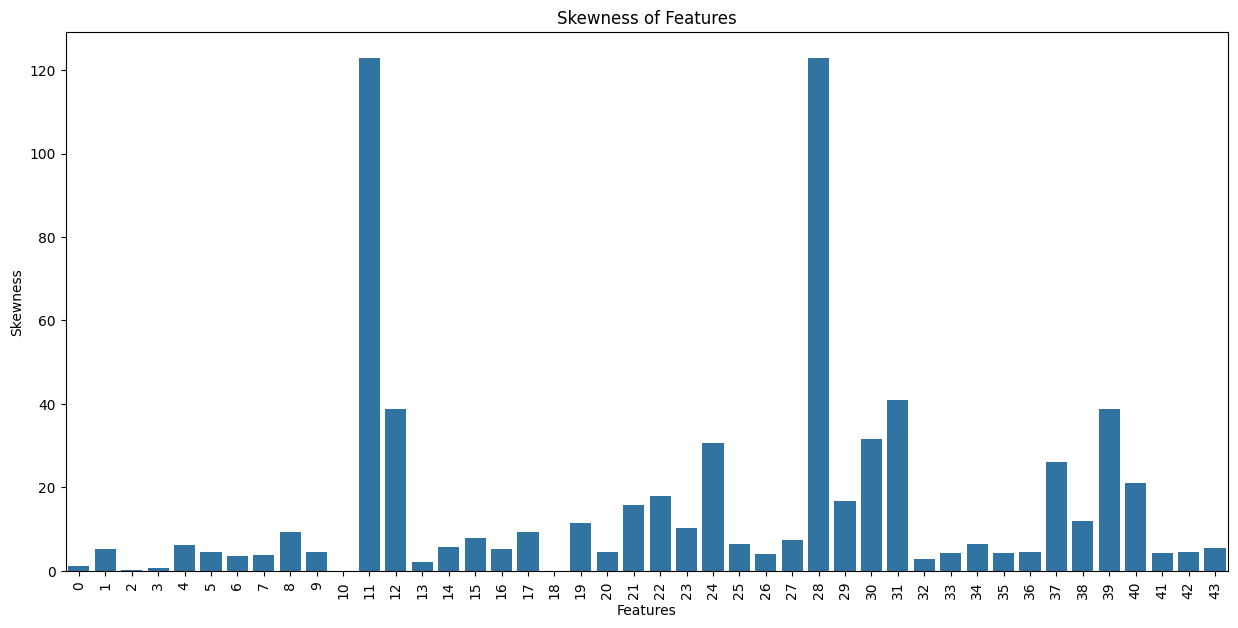

In [37]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.show()

## Univariate and Multivariate analysis

#### Looking at the distribution of Target variable

In [41]:
df['Cover_Type'].value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

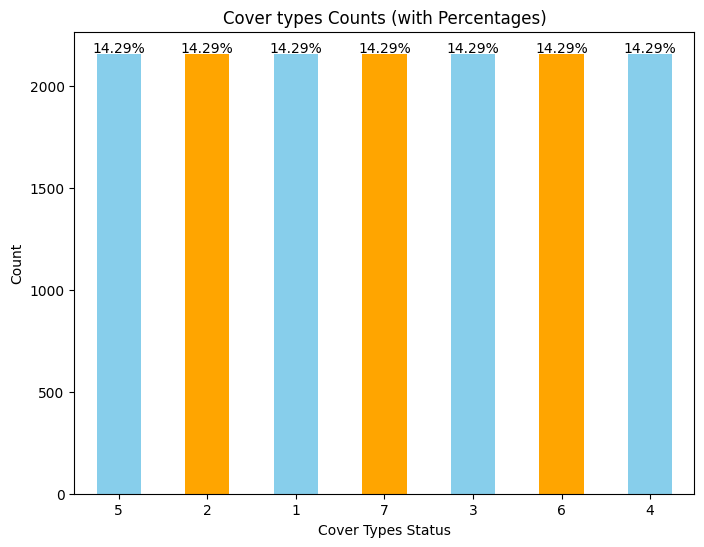

In [43]:
# Calculation of value counts and percentages of "Recurred class"
value_counts = df['Cover_Type'].value_counts()
percentages = (value_counts / len(df['Cover_Type'])) * 100

# Plot the bar chart
ax = value_counts.plot(
    kind='bar',
    color=['skyblue', 'orange'],
    figsize=(8, 6),
    title='Cover types Counts (with Percentages)',
    xlabel='Cover Types Status',
    ylabel='Count',
    rot=0
)

# Annotate bars with percentages
for i, count in enumerate(value_counts):
    percentage = f"{percentages.iloc[i]:.2f}%"  # Format percentage
    ax.text(i, count + 5, percentage, ha='center', fontsize=10)  # Adjust the offset as needed

plt.show()

Here we can see that the Target Variable has the equal distribution.

### Looking at the Numerical Features

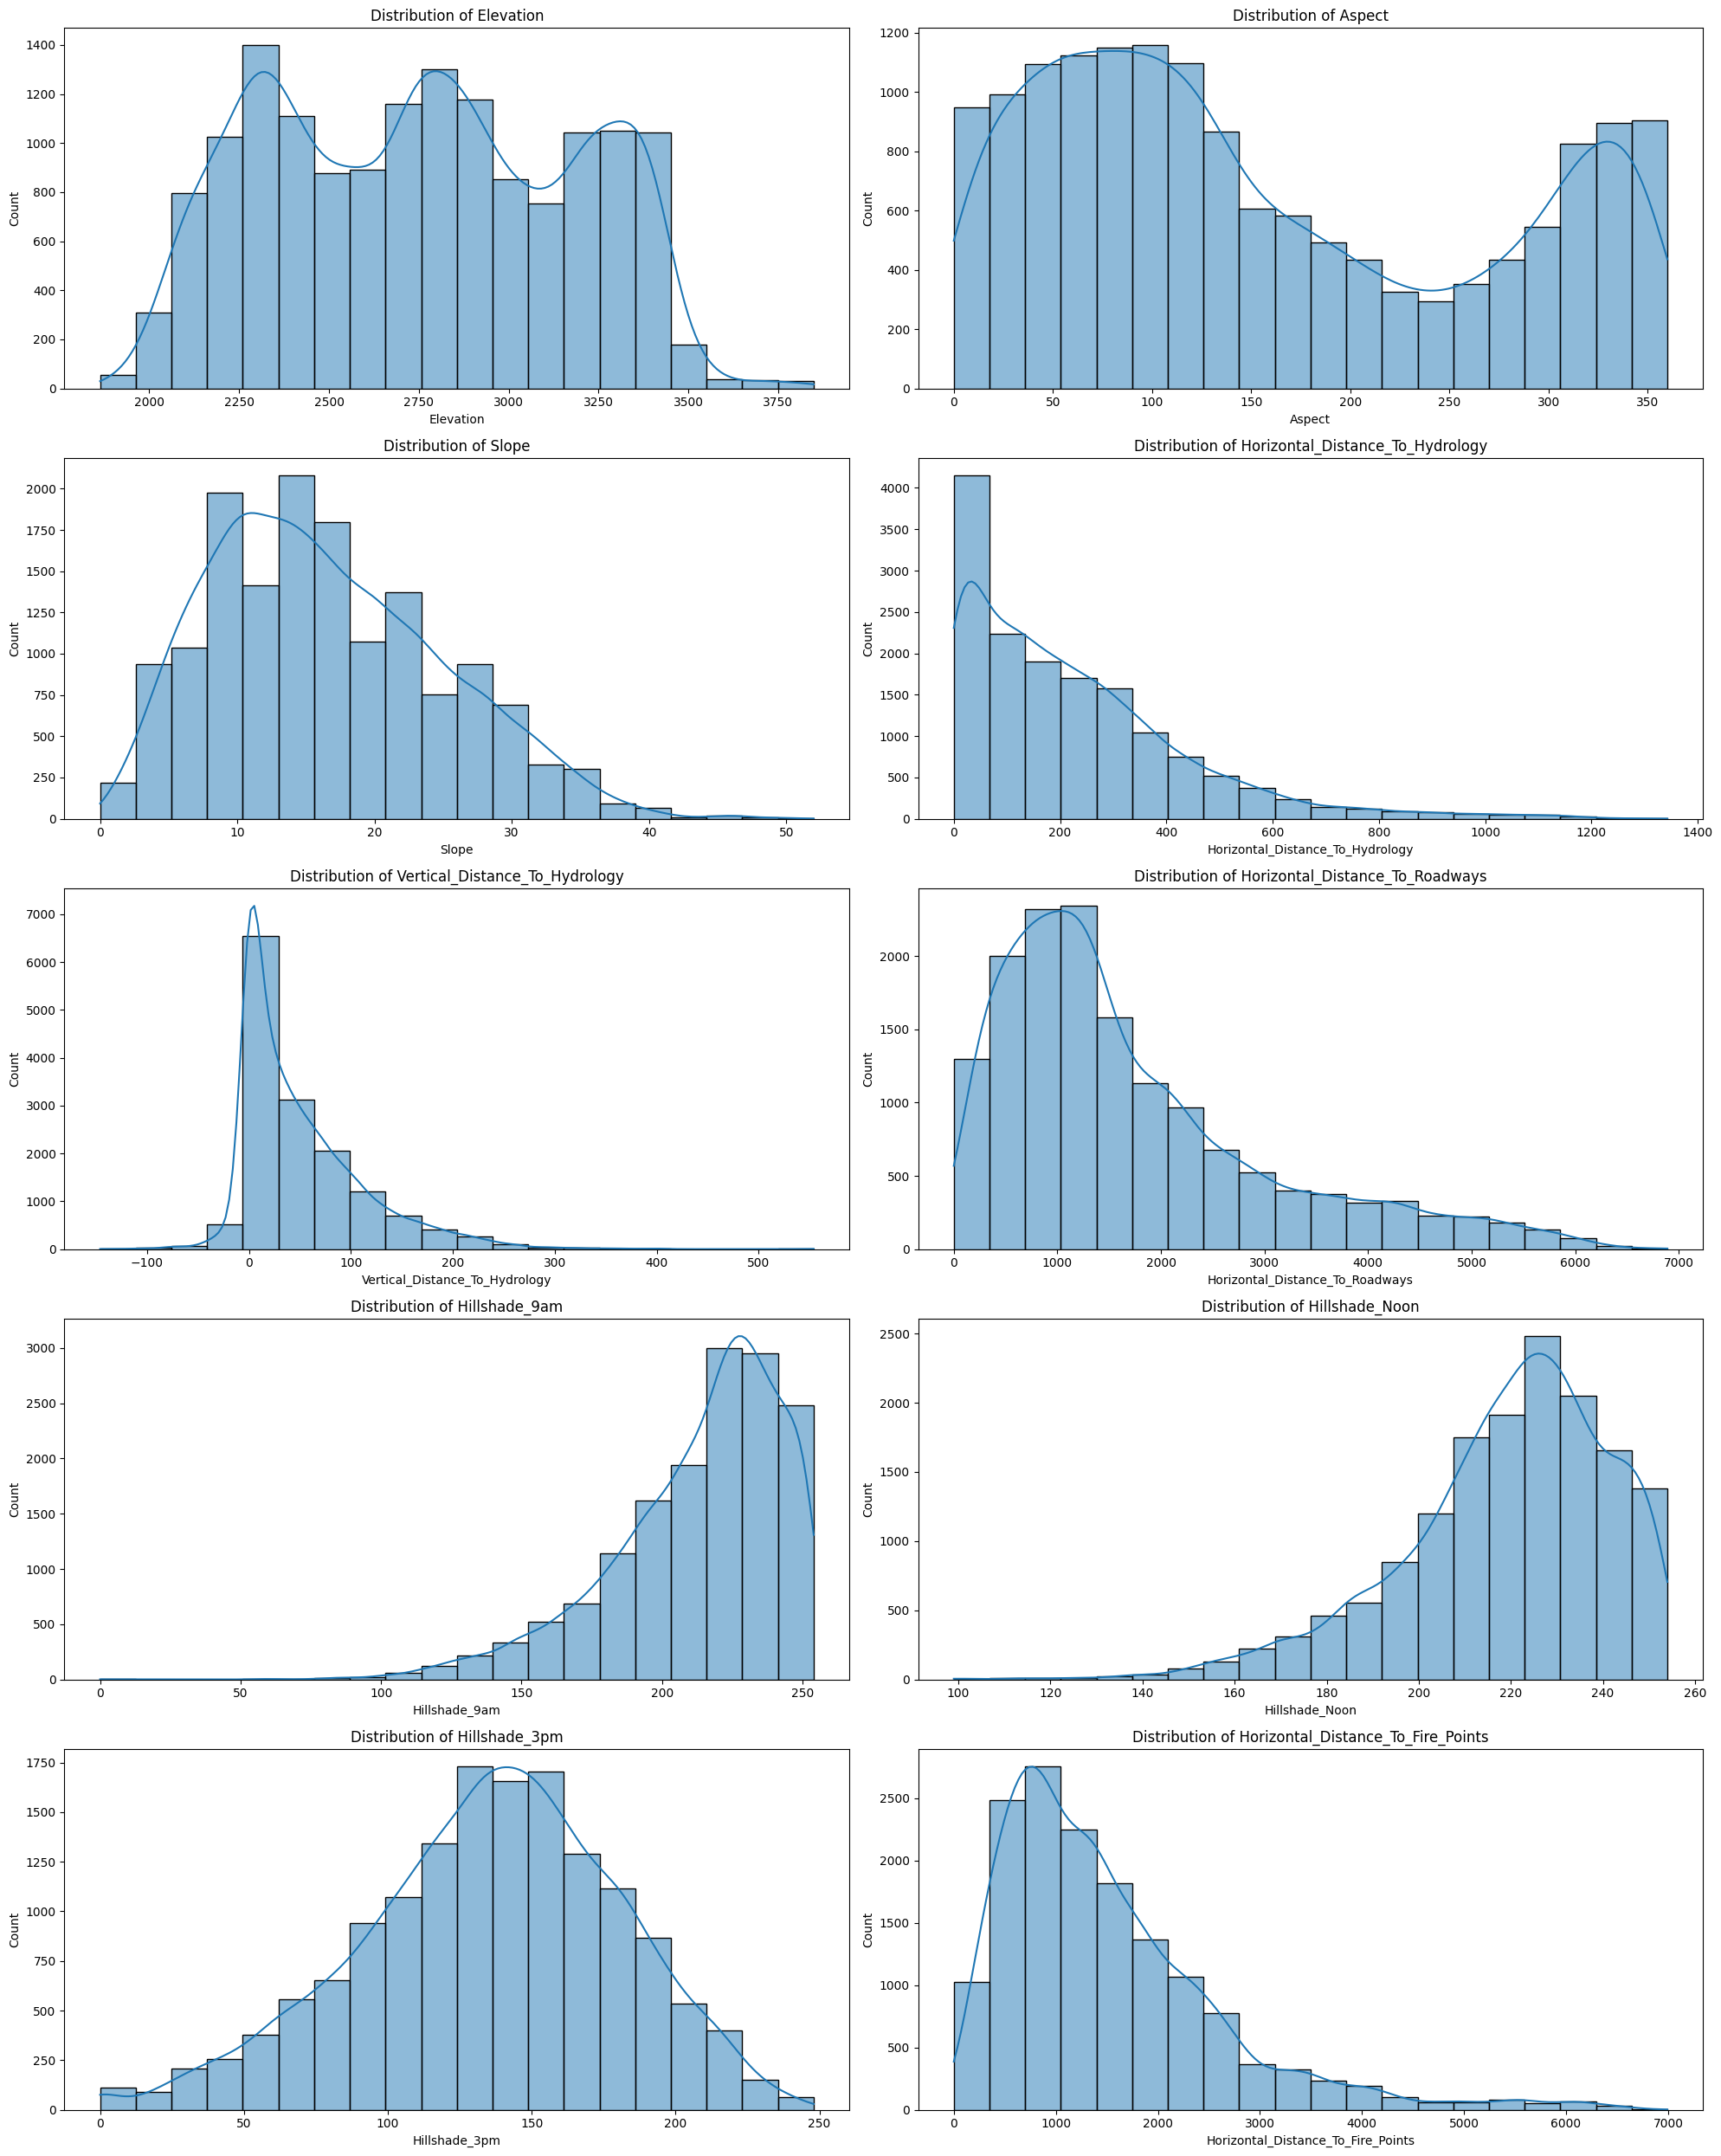

In [47]:
# Creating subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through columns and plot
for i, column in enumerate(num_feature.columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

 It seems all continuous numerical features are not normally distributed.

### Looking at the Categorical Features

In [51]:
# split cat_features
wilderness, soil_types = cat_feature.iloc[:,:4], cat_feature.iloc[:,4:]

In [53]:
wilderness

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
15115,0,0,1,0
15116,0,0,1,0
15117,0,0,1,0
15118,0,0,1,0


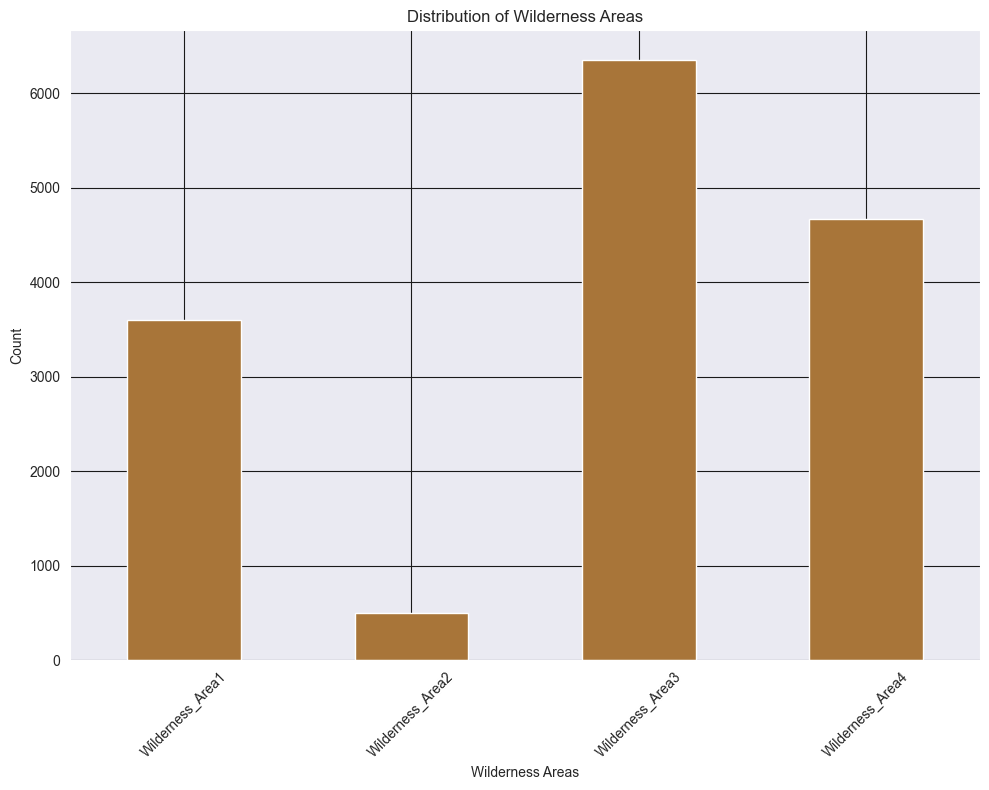

In [55]:
sns.set_style("darkgrid", {'grid.color': '.1'})
wilderness.sum().plot(kind='bar', figsize=(10,8), color='#a87539')
plt.title('Distribution of Wilderness Areas')
plt.xlabel('Wilderness Areas')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

we can see that the Wilderness Area_3 has the most presence in the data while Area_2 has the least amount of presence.

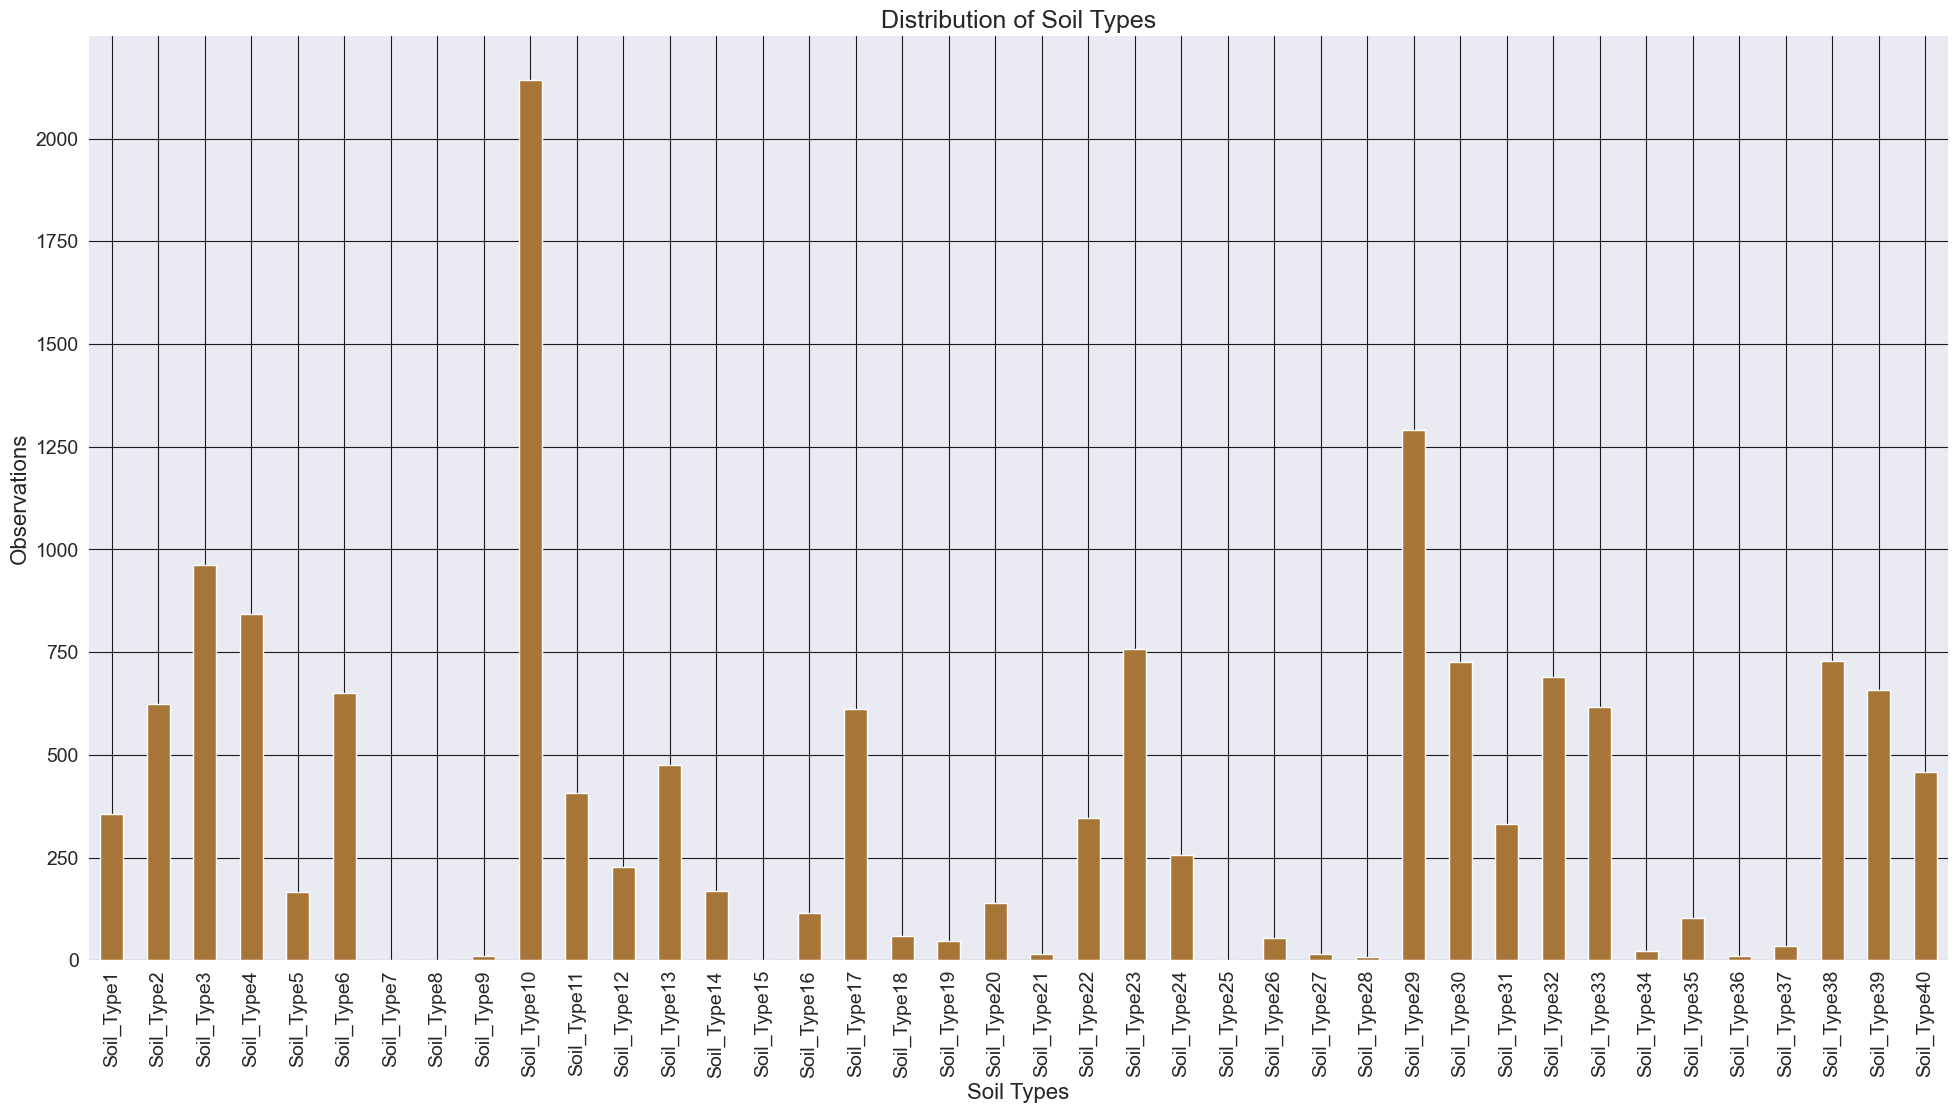

In [58]:
sns.set_style("darkgrid", {'grid.color': '.1'})
soil_types.sum().plot(kind='bar', figsize=(24,12), color='#a87539')
plt.title('Distribution of Soil Types', size=18)
plt.xlabel('Soil Types', size=16)
plt.ylabel('Observations', size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

Here also we can see that the Soil_Type_10 has the most presence in the data while Type_8 has the least amount of presence.

## Feature Comparison

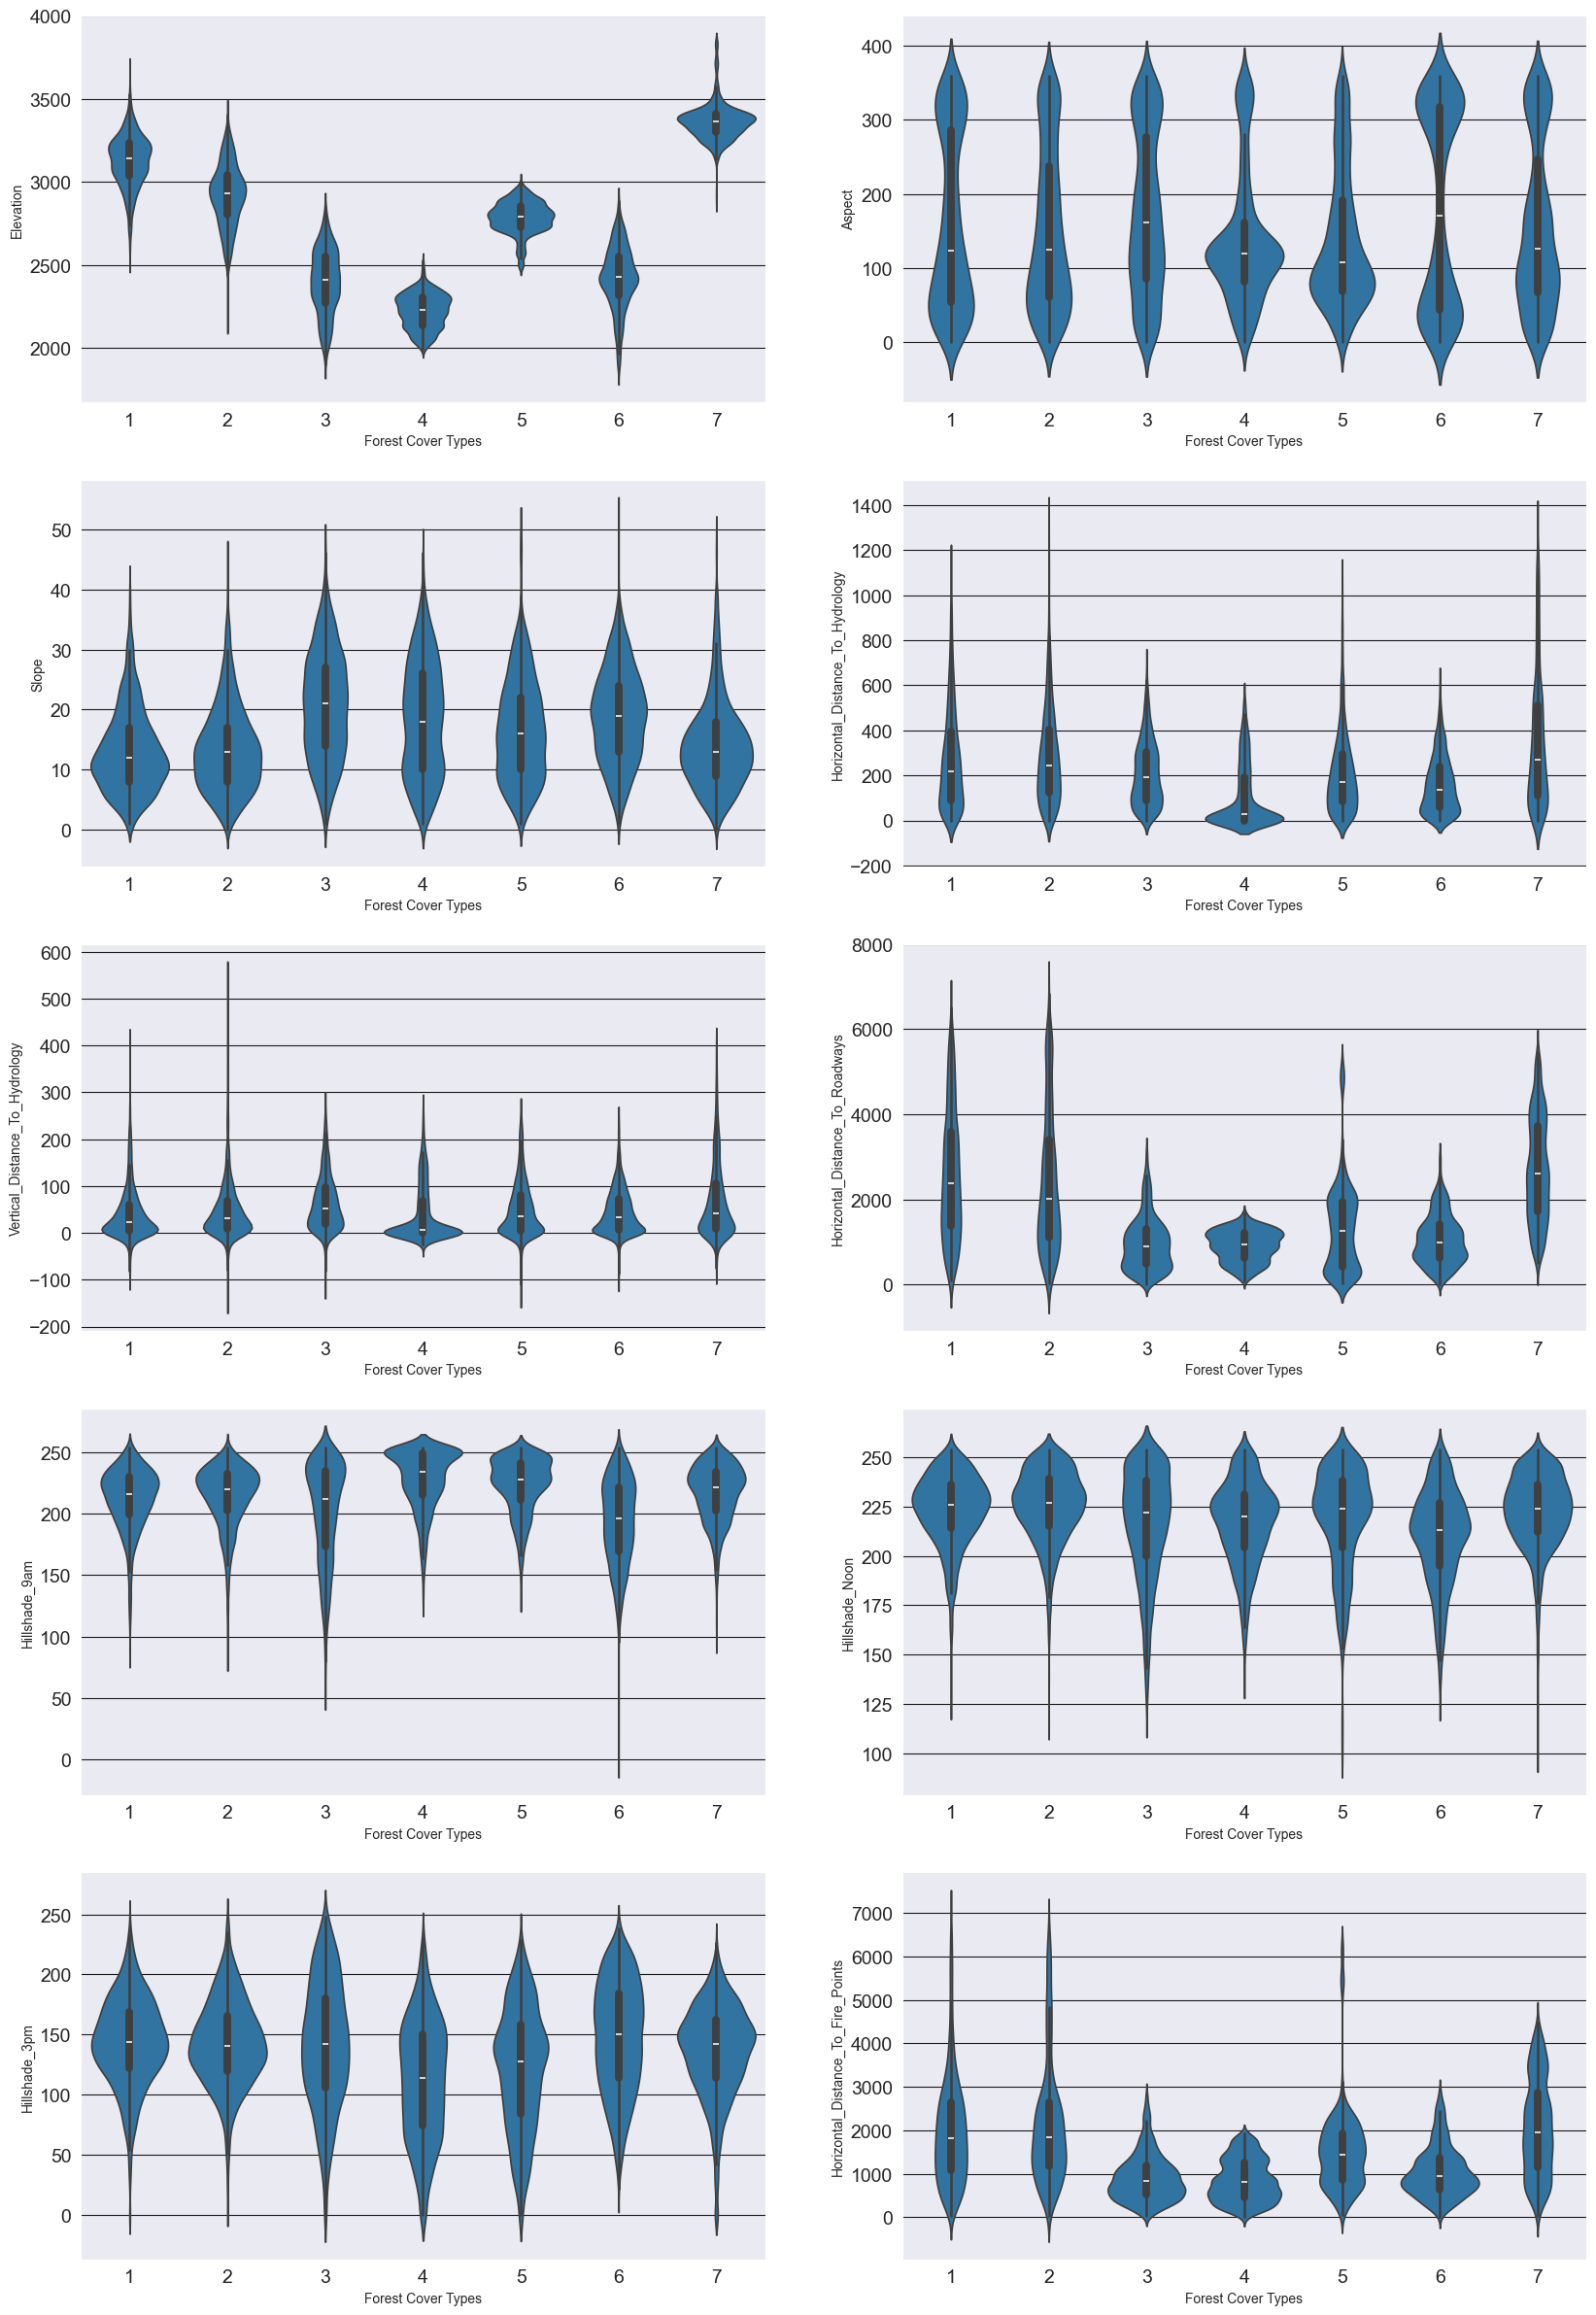

In [62]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = df['Cover_Type']

# features to be compared with target variable
features = num_feature.columns

plt.figure(figsize = [20,30])

# loop for violin plot
for i in range(0, len(features)):
    plt.subplot(5,2,1+i)
    sns.violinplot(data=num_feature, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types')
    plt.ylabel(features[i])

plt.show()

- Each subplot corresponds to a specific numeric feature, like Elevation, Aspect, Slope, etc., distributed across forest types.
- The shape and spread of the violins indicate the density and variability of values for each class.
- Features like Elevation and Distance show distinct separations among forest cover types, suggesting their potential significance in classification tasks.
- Some features have overlapping distributions across categories, which may indicate weaker predictive power. 
### Visual Characteristics:
- The violins have central white dots and thick black bars, representing the median and interquartile range, respectively.
- The smooth violin shapes capture the density of the data, with wider sections indicating higher frequencies.

## Feature Correlation

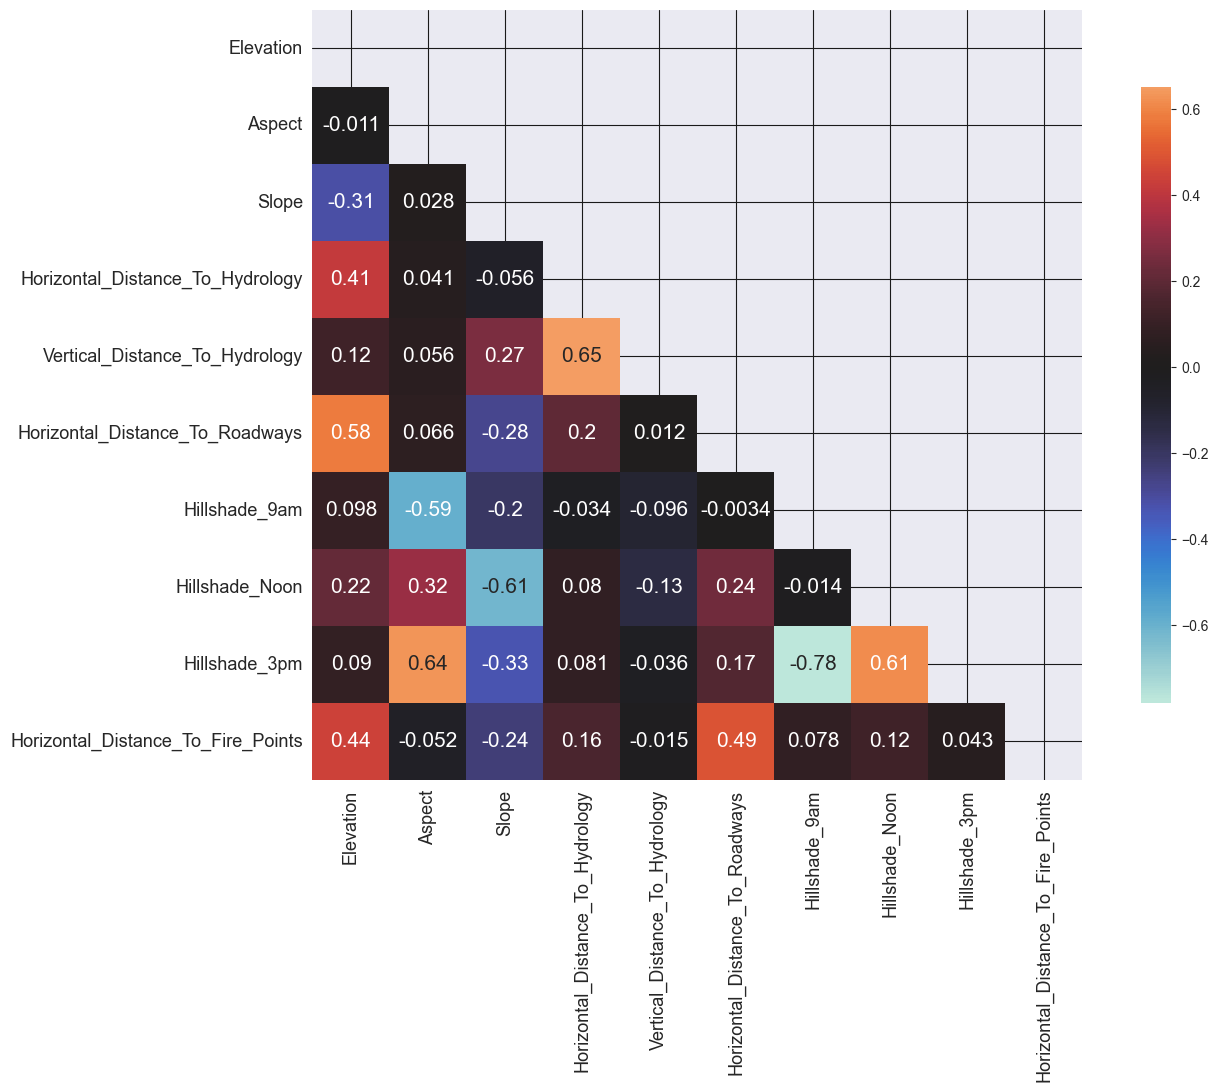

In [66]:
plt.subplots(figsize=(15,10))

# Compute the correlation matrix
num_feature_corr = num_feature.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(num_feature_corr, dtype=bool)  # Use `bool` instead of `np.bool`
mask[np.triu_indices_from(mask)] = True

# Generate heatmap masking the upper triangle and shrink the cbar
sns.heatmap(num_feature_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()


## Feature Insights:
### 1- Strong Positive Correlations:
- **Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology (0.65)** suggest that these distances are correlated.
- **Hillshade_Noon and Hillshade_3pm (0.61)** indicate that these two hillshade measurements are strongly correlated.
### 2- Strong Negative Correlations:
- **Hillshade_9am and Hillshade_3pm (-0.78)** are inversely correlated, as shadows in the morning are likely opposite to those in the afternoon.
- **Slope and Hillshade_Noon (-0.61)** imply that steeper slopes may influence sunlight distribution at noon.
### 3- Weak or Negligible Correlations:
- Most features, such as **Aspect and Elevation (-0.011)**, exhibit very weak relationships.

## Scaling the Data for the Models

In [70]:
num_feature.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [87]:
# Dropping the unnecessary columns from df
df=df.drop('Id',axis='columns')

cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

scaler = StandardScaler()
for col in cols:
    df[[col]] = scaler.fit_transform(df[[col]])
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,-1.397379,1.404943,1.719366,-0.208335,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,1.187676,0.089223,-0.960742,-0.169240,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,1.220398,0.045366,-1.135058,-0.294706,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,0.533231,0.790940,-0.350637,-0.526545,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


## Splitting to Train and Test

In [90]:
# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC

In [92]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [96]:
# set target variable
target = df['Cover_Type']

# features to be compared with target variable
features = df.drop('Cover_Type',axis='columns')

# features for Cross_Val_Score
features_scaled= df.drop('Cover_Type',axis='columns')

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12096, 54)
X_test shape: (3024, 54)
y_train shape: (12096,)
y_test shape: (3024,)


## Model Building Brfore Adding Feature Engineering

### 1- Softmax Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression
# Initializing and training the model
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000)   # by default multi nominal regression used
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Cross-Validation Score:", np.mean(cross_val_score(lr_model, features_scaled, target, scoring='accuracy', cv=10)))

Logistic Regression Report:
               precision    recall  f1-score   support

           1       0.67      0.70      0.69       421
           2       0.64      0.53      0.58       438
           3       0.64      0.53      0.58       428
           4       0.78      0.89      0.83       449
           5       0.70      0.79      0.74       416
           6       0.62      0.64      0.63       432
           7       0.91      0.90      0.91       440

    accuracy                           0.71      3024
   macro avg       0.71      0.71      0.71      3024
weighted avg       0.71      0.71      0.71      3024

Accuracy Score: 0.7123015873015873
Cross-Validation Score: 0.6599867724867725


### 2- Support Vector Machine (SVM)

In [101]:
from sklearn.svm import SVC

# Initializing and training the SVM model
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("Cross-Validation Score:", np.mean(cross_val_score(svm_model, features_scaled, target, scoring='accuracy', cv=10)))

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.75      0.73       421
           2       0.75      0.62      0.68       438
           3       0.73      0.69      0.71       428
           4       0.83      0.96      0.89       449
           5       0.83      0.88      0.86       416
           6       0.74      0.71      0.72       432
           7       0.93      0.93      0.93       440

    accuracy                           0.79      3024
   macro avg       0.79      0.79      0.79      3024
weighted avg       0.79      0.79      0.79      3024

Accuracy Score: 0.7926587301587301
Cross-Validation Score: 0.7076719576719577


### 3- Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the model
rf_model = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Cross-Validation Score:", np.mean(cross_val_score(rf_model, features_scaled, target, scoring='accuracy', cv=10)))
print("OOB Score:", rf_model.oob_score_)

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.77      0.78       421
           2       0.82      0.71      0.76       438
           3       0.83      0.84      0.84       428
           4       0.93      0.98      0.96       449
           5       0.89      0.96      0.92       416
           6       0.87      0.86      0.86       432
           7       0.95      0.97      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024

Accuracy Score: 0.8716931216931217
Cross-Validation Score: 0.7818783068783068
OOB Score: 0.8546626984126984


### 4- Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Training the model on the training data
dt_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Cross-Validation Score:", np.mean(cross_val_score(dt_model, features_scaled, target, scoring='accuracy', cv=10)))

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           1       0.65      0.69      0.67       421
           2       0.65      0.59      0.62       438
           3       0.76      0.75      0.75       428
           4       0.91      0.95      0.93       449
           5       0.85      0.91      0.88       416
           6       0.76      0.74      0.75       432
           7       0.92      0.90      0.91       440

    accuracy                           0.79      3024
   macro avg       0.79      0.79      0.79      3024
weighted avg       0.79      0.79      0.79      3024

Accuracy Score: 0.7893518518518519
Cross-Validation Score: 0.7093253968253969


## Adding Features from Feature Engineering

In [108]:
df=pd.read_csv("train.csv")
# Dropping the unnecessary columns from df
df=df.drop('Id',axis='columns')
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [110]:
from sklearn.preprocessing import FunctionTransformer

# Copy the dataset to avoid modifying the original
df_2 = df.copy()

# 1. Adding linear combinations and Euclidean distance features

# Adding linear combinations of the horizontal distance columns
df_2['Elevation_Vertical_Distance_To_Hydrology'] = df_2['Elevation'] + df_2['Vertical_Distance_To_Hydrology']
df_2['HD_Hydrology_Firepoints'] = df_2['Horizontal_Distance_To_Hydrology'] + df_2['Horizontal_Distance_To_Fire_Points']
df_2['HD_Hydrology_Roadways'] = df_2['Horizontal_Distance_To_Hydrology'] + df_2['Horizontal_Distance_To_Roadways']
df_2['HD_Firepoints_Roadways'] = df_2['Horizontal_Distance_To_Fire_Points'] + df_2['Horizontal_Distance_To_Roadways']

# 3. Ratio of Hillshade Values
df_2['Hillshade_9am_to_Noon_Ratio'] = df_2['Hillshade_9am'] / (df_2['Hillshade_Noon'] + 1e-5)  # Avoid division by zero
df_2['Hillshade_Noon_to_3pm_Ratio'] = df_2['Hillshade_Noon'] / (df_2['Hillshade_3pm'] + 1e-5)


# Adding Euclidean distance between Horizontal and Vertical Distance to Hydrology
df_2['Euclidean_Distance'] = np.sqrt(df_2['Horizontal_Distance_To_Hydrology']**2 + df_2['Vertical_Distance_To_Hydrology']**2)

# 2. Apply square root transformation to positive skewed features
square_root_transformer = FunctionTransformer(np.sqrt, validate=True)
df_2[['Elevation', 'Vertical_Distance_To_Hydrology']] = square_root_transformer.transform(df_2[['Elevation', 'Vertical_Distance_To_Hydrology']])

# 3. Remove original features after adding new ones
df_2.drop(columns=['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm'], inplace=True)

# 4. Recalculate Pearson Correlations
corr_matrix = df_2.corr()

# 5. Top Positive Correlations with Cover_Type
top_positive_corr = corr_matrix['Cover_Type'].sort_values(ascending=False).head(10)
print("Top Positive Correlations with Cover_Type:")
print(top_positive_corr)

# 6. Top Negative Correlations with Cover_Type
top_negative_corr = corr_matrix['Cover_Type'].sort_values(ascending=True).head(10)
print("\nTop Negative Correlations with Cover_Type:")
print(top_negative_corr)


Top Positive Correlations with Cover_Type:
Cover_Type          1.000000
Soil_Type38         0.257810
Soil_Type39         0.240384
Soil_Type40         0.205851
Soil_Type10         0.128972
Wilderness_Area3    0.122146
Soil_Type35         0.114327
Slope               0.087722
Wilderness_Area4    0.075774
Soil_Type37         0.071210
Name: Cover_Type, dtype: float64

Top Negative Correlations with Cover_Type:
Wilderness_Area1          -0.230117
Soil_Type29               -0.218564
Soil_Type22               -0.195993
Soil_Type23               -0.158762
Soil_Type32               -0.132312
Soil_Type12               -0.129985
HD_Firepoints_Roadways    -0.113834
HD_Hydrology_Roadways     -0.102820
Soil_Type24               -0.100797
HD_Hydrology_Firepoints   -0.087257
Name: Cover_Type, dtype: float64


C:\Users\farma\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\farma\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in sqrt
  return func(X, **(kw_args if kw_args else {}))


In [112]:
df_2.head()

,Elevation,Aspect,Slope,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Elevation_Vertical_Distance_To_Hydrology,HD_Hydrology_Firepoints,HD_Hydrology_Roadways,HD_Firepoints_Roadways,Hillshade_9am_to_Noon_Ratio,Hillshade_Noon_to_3pm_Ratio,Euclidean_Distance
0,50.950957,51,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2596,6537,768,6789,0.952586,1.567567,258.000000
1,50.892043,56,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2584,6437,602,6615,0.936170,1.556291,212.084889
2,52.952809,139,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2869,6389,3448,9301,0.983193,1.762963,275.769832
3,52.773099,155,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2903,6453,3332,9301,1.000000,1.950820,269.235956
4,50.941143,45,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2594,6325,544,6563,0.940171,1.560000,153.003268


In [114]:
cols = ['Elevation', 'Aspect', 'Slope', 'Elevation_Vertical_Distance_To_Hydrology','HD_Hydrology_Firepoints', 'HD_Hydrology_Roadways',
       'HD_Firepoints_Roadways','Euclidean_Distance','Hillshade_9am_to_Noon_Ratio','Hillshade_Noon_to_3pm_Ratio']

scaler = StandardScaler()
for col in cols:
    df_2[[col]] = scaler.fit_transform(df_2[[col]])
df_2

,Elevation,Aspect,Slope,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Elevation_Vertical_Distance_To_Hydrology,HD_Hydrology_Firepoints,HD_Hydrology_Roadways,HD_Firepoints_Roadways,Hillshade_9am_to_Noon_Ratio,Hillshade_Noon_to_3pm_Ratio,Euclidean_Distance
0,-0.332957,-0.959980,-1.597132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,-0.475940,4.165194,-0.848236,1.702247,-0.164430,-0.075202,0.102333
1,-0.347700,-0.914559,-1.715424,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,-0.503882,4.078395,-0.968254,1.619137,-0.251569,-0.075202,-0.110745
2,0.167995,-0.160577,-0.887379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.159736,4.036731,1.089401,2.902092,-0.001961,-0.075202,0.184798
3,0.123023,-0.015231,0.177250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0.238905,4.092283,1.005533,2.902092,0.087253,-0.075202,0.154476
4,-0.335413,-1.014485,-1.715424,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,-0.480597,3.981180,-1.010188,1.594299,-0.230333,-0.075202,-0.384926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,-0.305973,0.784172,0.768711,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.434028,-0.172160,-0.739786,-0.612901,-1.625757,-0.075202,0.102774
15116,-0.315778,-0.324091,0.295543,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.005586,0.190660,-0.499028,-0.612423,0.759787,-0.075201,1.978824
15117,-0.590964,-0.205998,1.005295,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.445670,-0.161744,-0.897400,-0.813512,0.811100,-0.075201,0.683784
15118,-0.603503,0.093779,1.360172,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-0.494568,-0.510677,-1.070920,-0.979732,-0.091927,-0.075202,0.020008


In [116]:
# set target variable
target_2 = df_2['Cover_Type']

# features to be compared with target variable
features_2 = df_2.drop('Cover_Type',axis='columns')

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_2, target_2, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12096, 54)
X_test shape: (3024, 54)
y_train shape: (12096,)
y_test shape: (3024,)


### 1- Softmax Regression Model

In [119]:
from sklearn.linear_model import LogisticRegression
# Initializing and training the model
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000)   # by default multi nominal regression used
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Cross-Validation Score:", np.mean(cross_val_score(lr_model, features_2, target_2, scoring='accuracy', cv=10)))

Logistic Regression Report:
               precision    recall  f1-score   support

           1       0.65      0.67      0.66       421
           2       0.62      0.52      0.56       438
           3       0.61      0.54      0.57       428
           4       0.75      0.86      0.80       449
           5       0.69      0.79      0.73       416
           6       0.61      0.59      0.60       432
           7       0.90      0.90      0.90       440

    accuracy                           0.70      3024
   macro avg       0.69      0.69      0.69      3024
weighted avg       0.69      0.70      0.69      3024

Accuracy Score: 0.6954365079365079
Cross-Validation Score: 0.648478835978836


### 2- Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Training the model on the training data
dt_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Cross-Validation Score:", np.mean(cross_val_score(dt_model, features_2, target_2, scoring='accuracy', cv=10)))

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           1       0.70      0.68      0.69       421
           2       0.65      0.63      0.64       438
           3       0.77      0.77      0.77       428
           4       0.92      0.93      0.93       449
           5       0.86      0.89      0.87       416
           6       0.79      0.78      0.79       432
           7       0.93      0.94      0.94       440

    accuracy                           0.80      3024
   macro avg       0.80      0.80      0.80      3024
weighted avg       0.80      0.80      0.80      3024

Accuracy Score: 0.8048941798941799
Cross-Validation Score: 0.7153439153439154


### 3- Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the model
rf_model = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Cross-Validation Score:", np.mean(cross_val_score(rf_model, features_2, target_2, scoring='accuracy', cv=10)))
print("OOB Score:", rf_model.oob_score_)

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.78      0.78       421
           2       0.83      0.70      0.76       438
           3       0.86      0.85      0.85       428
           4       0.93      0.98      0.96       449
           5       0.90      0.96      0.93       416
           6       0.87      0.89      0.88       432
           7       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024

Accuracy Score: 0.8779761904761905
Cross-Validation Score: 0.7914021164021163
OOB Score: 0.8662367724867724


### 4- GradientBoostingClassifier

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialization and training of the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

#  predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Cross-Validation Score:", np.mean(cross_val_score(gb_model, features_2, target_2, scoring='accuracy', cv=10)))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.73      0.73       421
           2       0.75      0.58      0.65       438
           3       0.76      0.75      0.75       428
           4       0.90      0.96      0.93       449
           5       0.79      0.91      0.84       416
           6       0.79      0.77      0.78       432
           7       0.93      0.95      0.94       440

    accuracy                           0.81      3024
   macro avg       0.80      0.81      0.80      3024
weighted avg       0.80      0.81      0.80      3024

Accuracy Score: 0.8078703703703703
Cross-Validation Score: 0.7207010582010581


### 5- Multi Layer Perceptron

In [133]:
from sklearn.neural_network import MLPClassifier

# Initialization and training the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=800, random_state=42)
mlp_model.fit(X_train, y_train)

# predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))


MLPClassifier Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.76      0.76       421
           2       0.77      0.68      0.72       438
           3       0.80      0.85      0.82       428
           4       0.93      0.96      0.95       449
           5       0.89      0.91      0.90       416
           6       0.85      0.84      0.84       432
           7       0.95      0.97      0.96       440

    accuracy                           0.85      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg       0.85      0.85      0.85      3024

Accuracy Score: 0.8525132275132276


## Hyperparameter Tuning For Best Parameters

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.utils import resample

# Subsample the training data for faster tuning
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)

# Defining the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', None],  # Number of features to consider for the best split
    'bootstrap': [True] 
}

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=10,  # Only test 10 combinations
    scoring='accuracy',
    cv=3,  # Reduce cross-validation folds
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluating the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Cross-Validation Accuracy: 0.849785052910053
Test Set Accuracy: 0.876984126984127


## Hyperparameter Tuning For Best Parameters with PCA

### 1- For Random Forest

In [256]:
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

# Defining parameter grid for RandomizedSearchCV
random_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],  # Number of components to test
    'rf__n_estimators': randint(50, 200),  # Number of trees
    'rf__max_depth': randint(10, 50),  # Maximum depth of the tree
    'rf__min_samples_split': randint(2, 10),  # Minimum samples required to split a node
    'rf__min_samples_leaf': randint(1, 5),  # Minimum samples required at a leaf node
    'rf__max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'rf__bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Step 1: Define a pipeline with PCA and a Random Forest Classifier
pipeline = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=random_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Utilize all cores
)

# Perform random search
print("Running RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("\nBest Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluating the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Running RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters from RandomizedSearchCV: {'pca__n_components': 30, 'rf__bootstrap': False, 'rf__max_depth': 41, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 162}
Best Cross-Validation Accuracy: 0.8351524945421748
Test Set Accuracy: 0.8558201058201058


In [258]:
# Best Estimator
best_rf_model = random_search.best_estimator_
best_rf_model

Pipeline(steps=[('pca', PCA(n_components=30)),
                ('rf',
                 RandomForestClassifier(bootstrap=False, max_depth=41,
                                        max_features='log2',
                                        min_samples_split=5, n_estimators=162,
                                        random_state=42))])

In [260]:
# Training the model with Best Hyperparameters from GridSearchCV
best_rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluating the model's performance
print("Best MLP Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_rf))
print("Cross-Validation Score:", np.mean(cross_val_score(best_rf_model, X_train, y_train, scoring='accuracy', cv=10)))

Best MLP Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.76      0.76       421
           2       0.78      0.71      0.74       438
           3       0.82      0.82      0.82       428
           4       0.91      0.97      0.94       449
           5       0.89      0.94      0.92       416
           6       0.85      0.82      0.84       432
           7       0.95      0.96      0.96       440

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024

Accuracy Score: 0.8558201058201058
Cross-Validation Score: 0.8426738852545304


### 2- For MLP

In [262]:
# Defining the pipeline
pipeline = Pipeline([
    ('pca', PCA()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'pca__n_components': [15, 20, 25,30],  # Number of PCA components
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 50, 25)],  # Different layer configurations
    'mlp__activation': ['tanh', 'relu'],  # Activation functions
    'mlp__solver': ['adam', 'sgd'],  # Optimizers
    'mlp__alpha': uniform(0.0001, 0.01),  # Regularization parameter
    'mlp__learning_rate': ['constant', 'adaptive']  # Learning rate strategies
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform the hyperparameter search
print("Running RandomizedSearchCV for MLPClassifier with PCA...")
random_search.fit(X_train, y_train)

# Display the best parameters and results
print("\nBest Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_mlp_model = random_search.best_estimator_
y_pred_best = best_mlp_model.predict(X_test)
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_best))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best))


Running RandomizedSearchCV for MLPClassifier with PCA...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters from RandomizedSearchCV: {'mlp__activation': 'tanh', 'mlp__alpha': 0.007168573438476171, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam', 'pca__n_components': 25}
Best Cross-Validation Accuracy: 0.8354827997362477

Test Set Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.75      0.75       421
           2       0.74      0.68      0.71       438
           3       0.88      0.81      0.84       428
           4       0.93      0.97      0.95       449
           5       0.88      0.94      0.91       416
           6       0.85      0.88      0.87       432
           7       0.95      0.95      0.95       440

    accuracy                           0.86      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg       0.85     

In [264]:
# Best Estimator
best_mlp_model = random_search.best_estimator_
best_mlp_model

Pipeline(steps=[('pca', PCA(n_components=25)),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.007168573438476171,
                               hidden_layer_sizes=(100, 50), max_iter=1000,
                               random_state=42))])

In [266]:
# Training the model with Best Hyperparameters from RandomSearchCV
best_mlp_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_best_mlp = best_mlp_model.predict(X_test)

# Evaluating the model's performance
print("Best MLP Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_rf))
print("Cross-Validation Score:", np.mean(cross_val_score(best_mlp_model, X_train, y_train, scoring='accuracy', cv=10)))

Best MLP Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.76      0.76       421
           2       0.78      0.71      0.74       438
           3       0.82      0.82      0.82       428
           4       0.91      0.97      0.94       449
           5       0.89      0.94      0.92       416
           6       0.85      0.82      0.84       432
           7       0.95      0.96      0.96       440

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024

Accuracy Score: 0.8558201058201058
Cross-Validation Score: 0.8416822864330197


## Plotting Learning Curve

In [268]:
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='accuracy', n_jobs=-1):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.grid()

    # Plot the mean and standard deviation for training scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")

    # Plot the mean and standard deviation for validation scores
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Score")

    plt.legend(loc="best")
    plt.show()

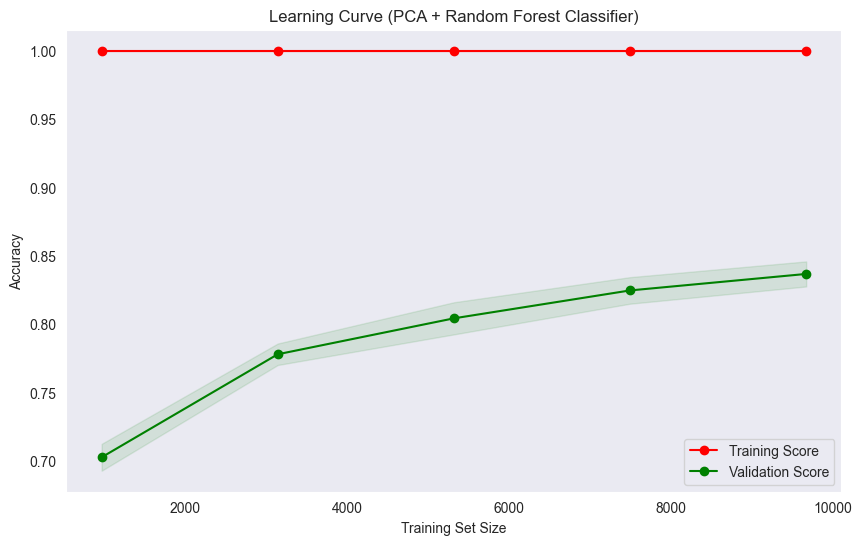

In [270]:
# Using the best pipeline from RandomizedSearchCV of Random Forest
plot_learning_curve(best_rf_model, X_train, y_train,
                    title="Learning Curve (PCA + Random Forest Classifier)", cv=5)

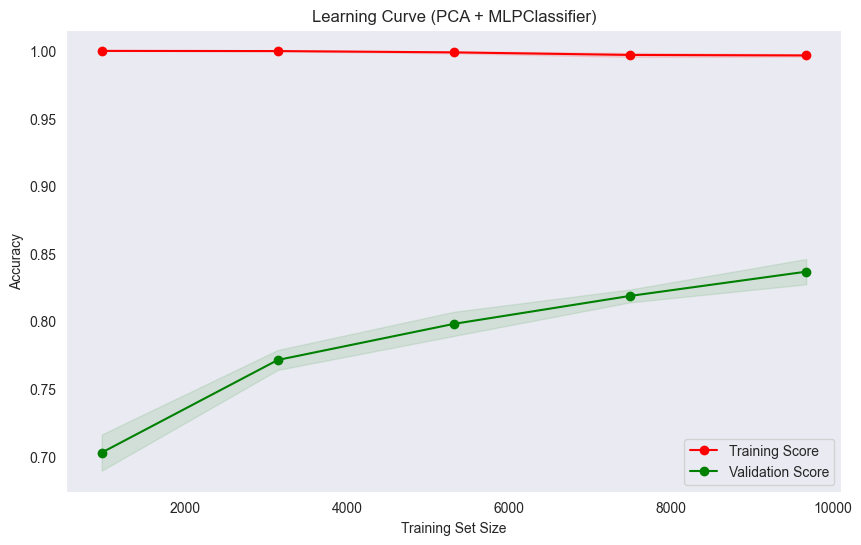

In [274]:
# Using the best pipeline from RandomizedSearchCV of MLP Classifier
plot_learning_curve(best_mlp_model, X_train, y_train,
                    title="Learning Curve (PCA + MLPClassifier)", cv=5)

## Comparision of Model Performence

In [285]:
# Defining the models and their corresponding accuracy and cross-validation scores
model_performance = {
    "Model": [
        "Logistic Regression", "Random Forest",
        "Decision Tree", "Gradient Boosting",
        "MLPClassifier", "Optimized Random Forest With PCA", "Optimized MLPClassifier With PCA"
    ],
    "Accuracy": [
        0.6954365079365079, 0.8779761904761905,0.8048941798941799, 0.8078703703703703, 0.8525132275132276,
        0.8558201058201058, 0.8551587301587301
    ]
}

# Convert the data into a pandas DataFrame for better handling
df2 = pd.DataFrame(model_performance)
df2

,Model,Accuracy
0,Logistic Regression,0.695437
1,Random Forest,0.877976
2,Decision Tree,0.804894
3,Gradient Boosting,0.807870
4,MLPClassifier,0.852513
5,Optimized Random Forest With PCA,0.855820
6,Optimized MLPClassifier With PCA,0.855159


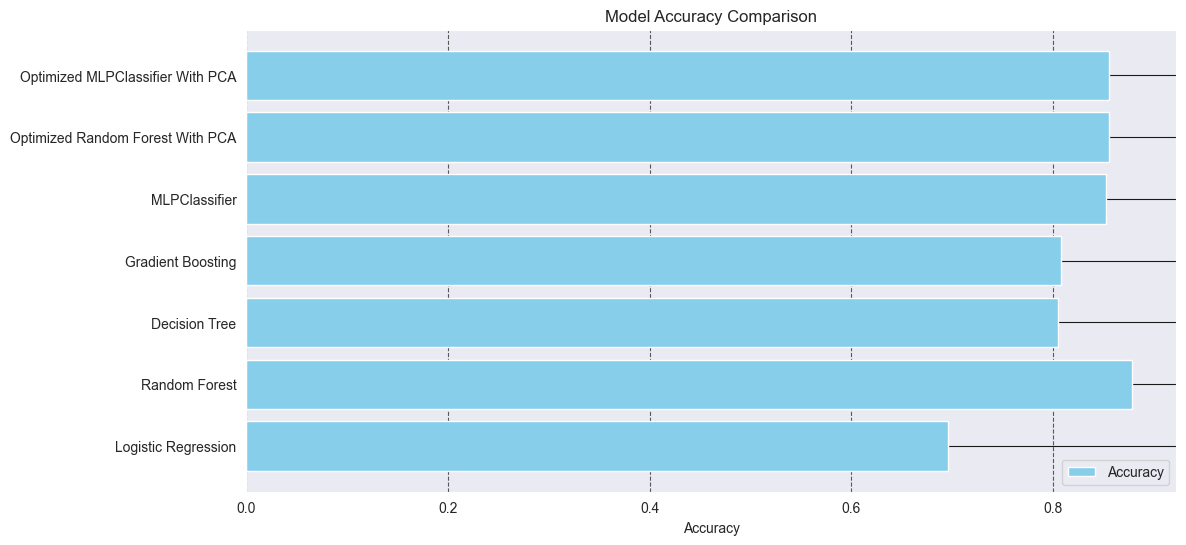

In [287]:
# Plotting accuracy comparison
plt.figure(figsize=(12, 6))
plt.barh(df2['Model'], df2['Accuracy'], color='skyblue', label='Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Feature importance

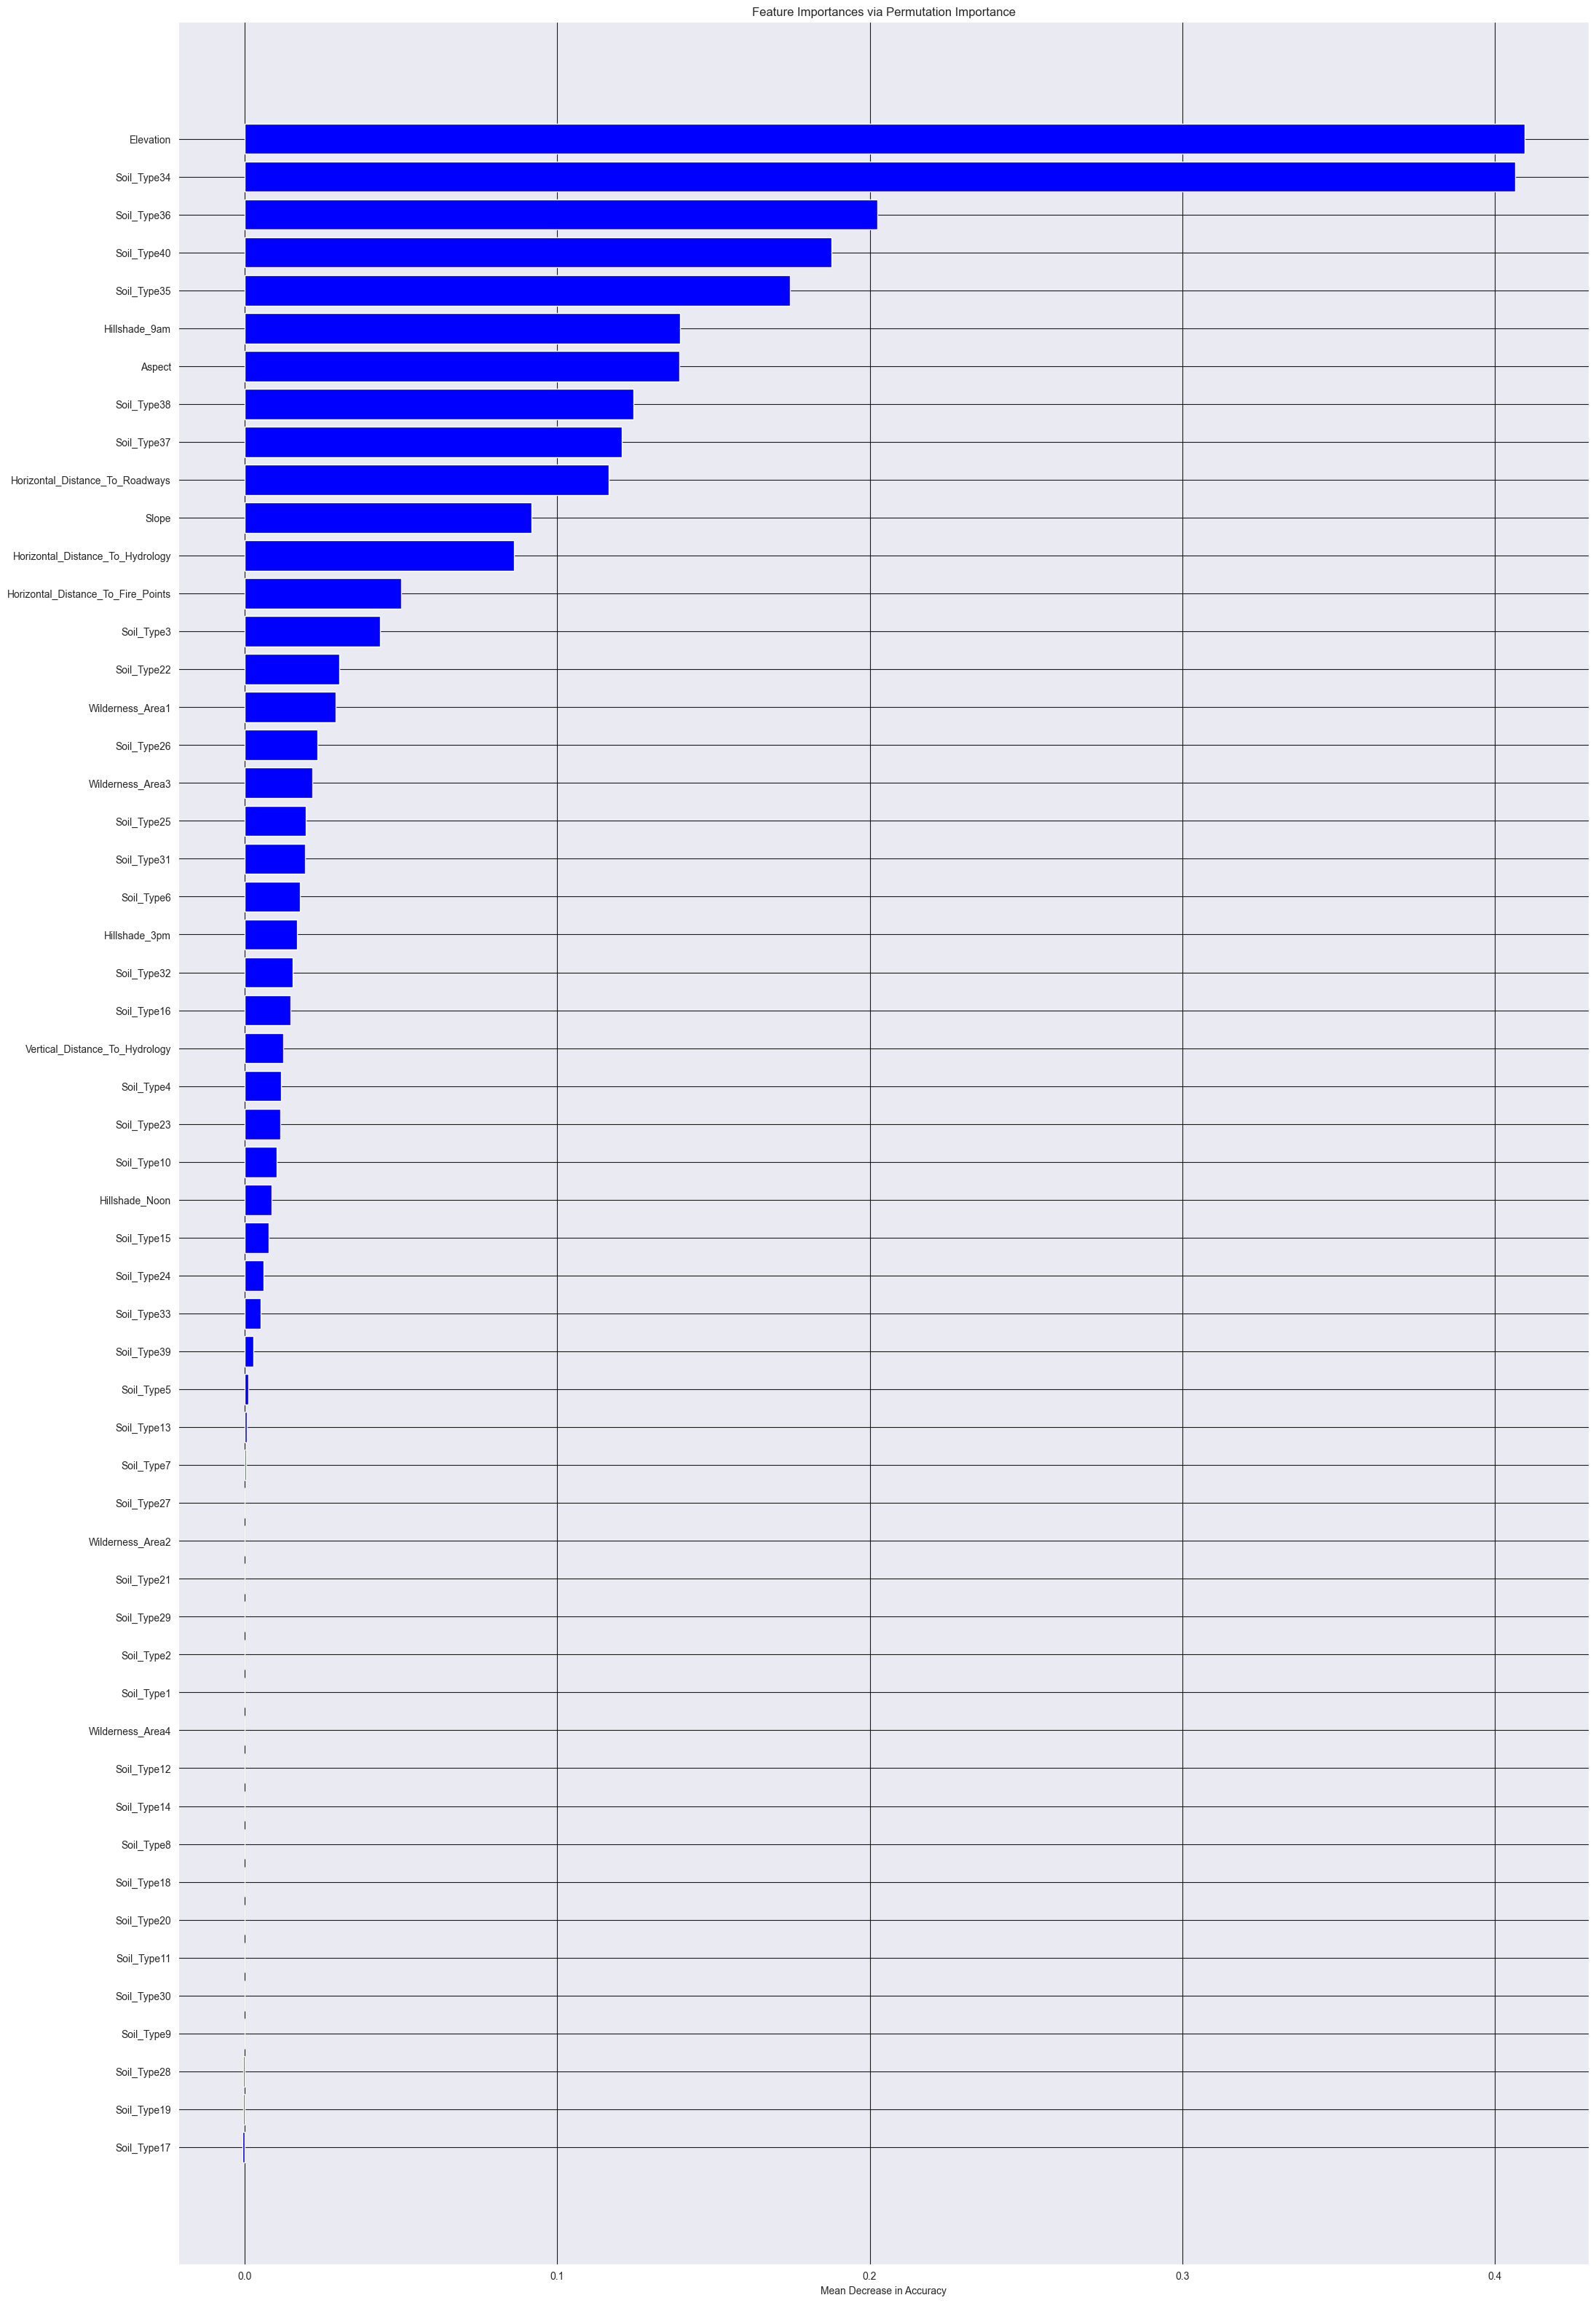

In [296]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_mlp_model, X_test, y_test, n_repeats=10, random_state=42)
# Extracting importances and feature names
importances = result.importances_mean
indices = np.argsort(importances)

# to get the feature names
feature_names = list(df.columns)
feature_names.remove('Cover_Type')  # Remove target column if present

# Plotting feature importances
plt.figure(figsize=(25,40))
plt.title('Feature Importances via Permutation Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Mean Decrease in Accuracy')
plt.show()

- **Top features:** Features like Elevation, Soil_Type38, and Soil_Type39 have the most significant impact on model accuracy.
- **Bottom features:** Some features, such as Soil_Type17, Soil_Type19, and others, contribute very little to the model's performance.
- If we select top features from the above then the model accuracy will be increase by 0.95 to 0.98.

# Model Deployment

In [305]:
import joblib

# Saving the trained model
joblib.dump(rf_model, 'Random_Forest.pkl')
joblib.dump(best_rf_model,'Optimized_Random_Forest.pkl')
joblib.dump(best_mlp_model ,'Optimized_Multi_layer_perceptron.pkl')

['Optimized_Multi_layer_perceptron.pkl']